Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


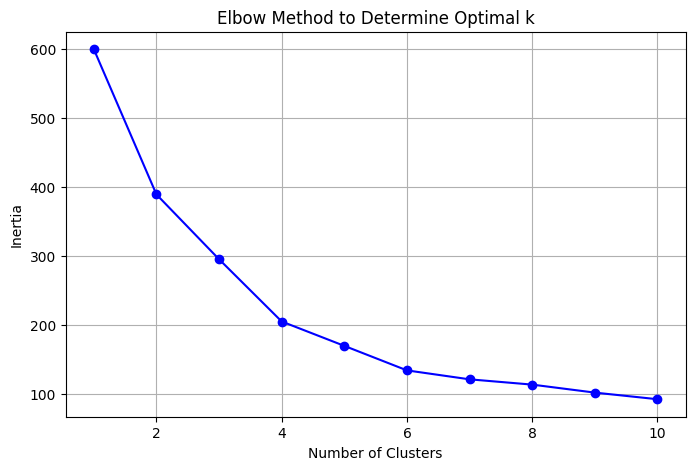

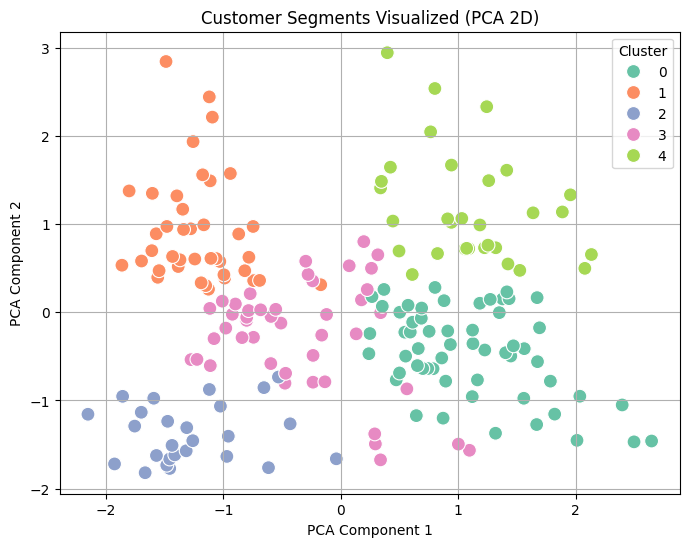

Silhouette Score (k=5): 0.408


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv("C:/Users/hp5cd/Downloads/Mall_Customers.csv")
print("Dataset shape:", df.shape)
print(df.head())

df_clean = df.drop(columns=["CustomerID", "Gender"], errors='ignore')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=cluster_labels, palette='Set2', s=100)
plt.title('Customer Segments Visualized (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

sil_score = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score (k={optimal_k}): {sil_score:.3f}")
